In [2]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7111 - loss: 1.5921 - val_accuracy: 0.7897 - val_loss: 0.9194
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.7589 - loss: 0.9976 - val_accuracy: 0.7897 - val_loss: 0.8850
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.7553 - loss: 0.9832 - val_accuracy: 0.7897 - val_loss: 0.8783
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.7474 - loss: 1.0067 - val_accuracy: 0.7897 - val_loss: 0.8769
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7608 - loss: 0.9573 - val_accuracy: 0.7897 - val_loss: 0.8763
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7561 - loss: 0.9713 - val_accuracy: 0.7897 - val_loss: 0.8748
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7561 - loss: 0.9702 - val_accuracy: 0.7897 - val_loss: 0.8768
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7595 - loss: 0.9664 - val_accuracy: 0.789

ValueError: too many values to unpack (expected 2)

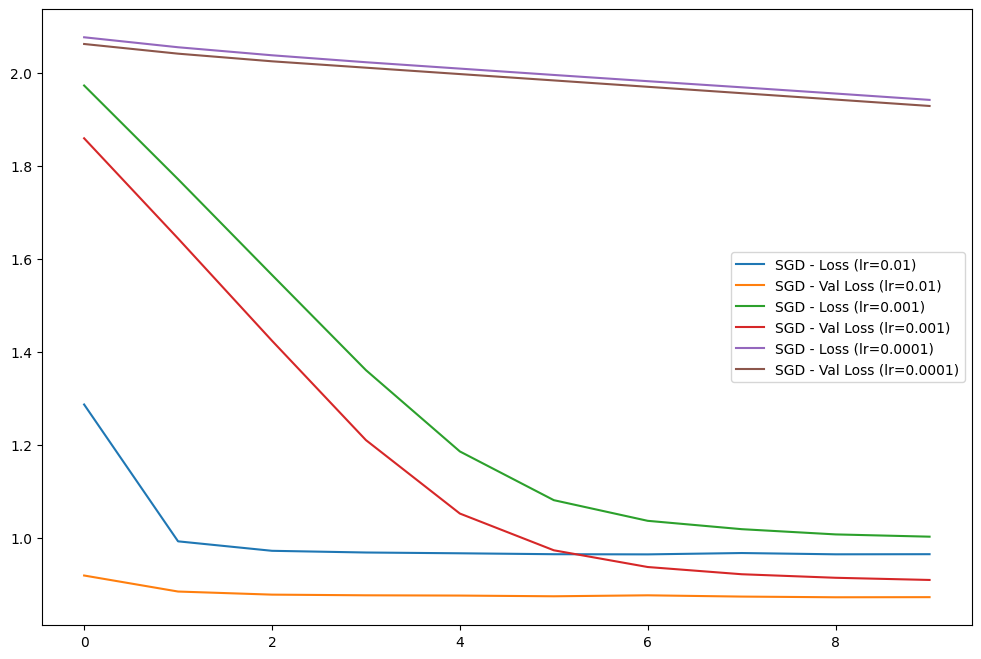

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import matplotlib.pyplot as plt

# Load dataset (replace path with actual path)
train_data = pd.read_csv('/content/drive/MyDrive/IDL/Assignment#3/atis_intents_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/IDL/Assignment#3/atis_intents_test.csv')

# Extract queries and intents
X_train = train_data.iloc[:, 1]  # Queries
y_train = train_data.iloc[:, 0]  # Intents
X_test = test_data.iloc[:, 1]
y_test = test_data.iloc[:, 0]

# Encode intents
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Tokenize and pad queries
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, padding='post')
X_test_pad = pad_sequences(X_test_seq, padding='post')

# Model definition
def build_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=X_train_pad.shape[1]))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    return model

# Train and plot results
def train_and_plot(optimizer, optimizer_name, lr):
    model = build_model()
    opt = optimizer(learning_rate=lr)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=10, batch_size=32)

    # Plotting
    plt.plot(history.history['loss'], label=f'{optimizer_name} - Loss (lr={lr})')
    plt.plot(history.history['val_loss'], label=f'{optimizer_name} - Val Loss (lr={lr})')
    plt.legend()

# Apply different optimizers and learning rates
plt.figure(figsize=(12, 8))
optimizers = [(SGD, 'SGD'), (SGD, 'SGD-Momentum', 0.9), (RMSprop, 'RMSprop'), (Adam, 'Adam')]
lrs = [0.01, 0.001, 0.0001]

for opt, name in optimizers:
    for lr in lrs:
        train_and_plot(opt, name, lr)

plt.title('Optimizer Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Training Data:
        atis_flight  \
0       atis_flight   
1  atis_flight_time   
2      atis_airfare   
3      atis_airfare   
4       atis_flight   

   i want to fly from boston at 838 am and arrive in denver at 1110 in the morning  
0   what flights are available from pittsburgh to...                                
1   what is the arrival time in san francisco for...                                
2            cheapest airfare from tacoma to orlando                                
3   round trip fares from pittsburgh to philadelp...                                
4   i need a flight tomorrow from columbus to min...                                

Testing Data:
    atis_flight  \
0  atis_airfare   
1   atis_flight   
2   atis_flight   
3   atis_flight   
4   atis_flight   

   i would like to find a flight from charlotte to las vegas that makes a stop in st. louis  
0   on april first i need a ticket from tacoma to...                                         
1   on april first

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.7446 - loss: 1.5157 - val_accuracy: 0.7497 - val_loss: 1.0249
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - accuracy: 0.7635 - loss: 1.0795 - val_accuracy: 0.7497 - val_loss: 0.9984
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.7689 - loss: 1.0513 - val_accuracy: 0.7497 - val_loss: 0.9868
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.7608 - loss: 1.0581 - val_accuracy: 0.7497 - val_loss: 0.9783
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - accuracy: 0.7439 - loss: 1.0686 - val_accuracy: 0.7497 - val_loss: 0.9727
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.7625 - loss: 1.0261 - val_accuracy: 0.7497 - val_loss: 0.9684
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - accuracy: 0.7663 - loss: 1.0129 - val_accuracy: 0.7497 - val_loss: 0.9656
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.7525 - loss: 1.0245 - val

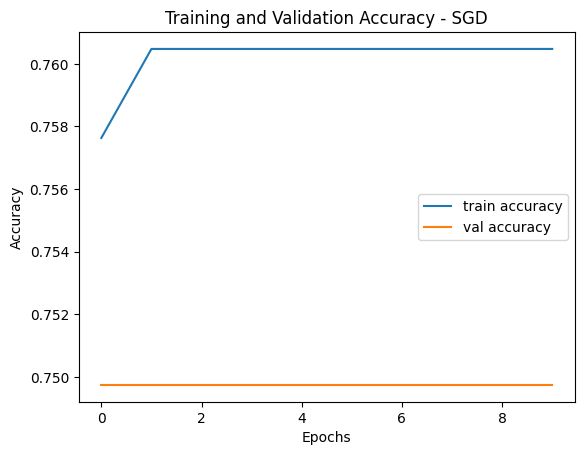

Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.7632 - loss: 0.9938 - val_accuracy: 0.7497 - val_loss: 0.9072
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 15s 123ms/step - accuracy: 0.7582 - loss: 0.9208 - val_accuracy: 0.7497 - val_loss: 0.7337
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - accuracy: 0.7660 - loss: 0.7517 - val_accuracy: 0.7942 - val_loss: 0.6101
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - accuracy: 0.7932 - loss: 0.6235 - val_accuracy: 0.8469 - val_loss: 0.5426
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.8158 - loss: 0.5747 - val_accuracy: 0.8563 - val_loss: 0.4844
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.8295 - loss: 0.5047 - val_accuracy: 0.8376 - val_loss: 0.4745
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.8425 - loss: 0.4781 - val_accuracy: 0.8749 - val_loss: 0.4090
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.8448 - loss: 0

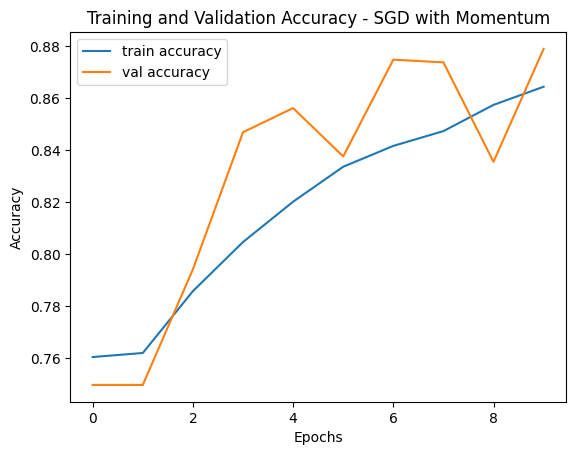

Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.8755 - loss: 0.3799 - val_accuracy: 0.8935 - val_loss: 0.2962
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.8788 - loss: 0.3585 - val_accuracy: 0.9224 - val_loss: 0.2737
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step - accuracy: 0.9057 - loss: 0.2670 - val_accuracy: 0.9359 - val_loss: 0.2303
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.9137 - loss: 0.2582 - val_accuracy: 0.9328 - val_loss: 0.2143
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - accuracy: 0.9331 - loss: 0.2049 - val_accuracy: 0.9493 - val_loss: 0.2054
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step - accuracy: 0.9382 - loss: 0.1897 - val_accuracy: 0.9617 - val_loss: 0.1815
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.9521 - loss: 0.1545 - val_accuracy: 0.9648 - val_loss: 0.1400
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms/step - accuracy: 0.9518 - loss: 0

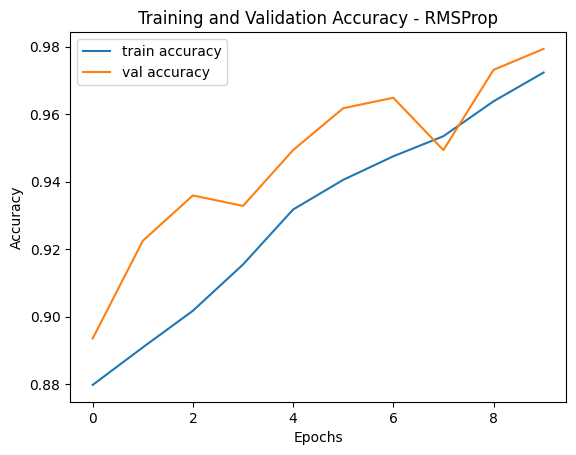

Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 24s 134ms/step - accuracy: 0.9713 - loss: 0.1160 - val_accuracy: 0.9721 - val_loss: 0.1092
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step - accuracy: 0.9731 - loss: 0.0867 - val_accuracy: 0.9804 - val_loss: 0.1152
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.9801 - loss: 0.0761 - val_accuracy: 0.9793 - val_loss: 0.1267
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.9788 - loss: 0.0660 - val_accuracy: 0.9783 - val_loss: 0.1516
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.9836 - loss: 0.0651 - val_accuracy: 0.9814 - val_loss: 0.1177
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - accuracy: 0.9866 - loss: 0.0475 - val_accuracy: 0.9814 - val_loss: 0.1511
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.9843 - loss: 0.0527 - val_accuracy: 0.9835 - val_loss: 0.1125
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.9905 - loss: 0

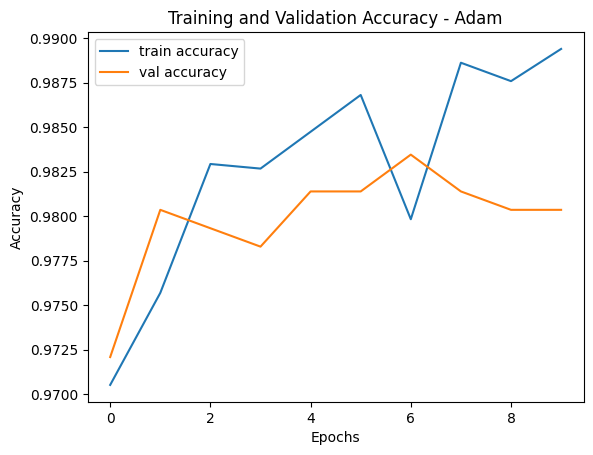

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step
Test Accuracy: 0.97
                     precision    recall  f1-score   support

  atis_abbreviation       1.00      0.79      0.88        33
      atis_aircraft       0.89      0.89      0.89         9
       atis_airfare       0.92      0.96      0.94        48
       atis_airline       0.95      1.00      0.97        38
        atis_flight       0.99      0.98      0.98       631
   atis_flight_time       1.00      1.00      1.00         1
atis_ground_service       0.97      1.00      0.99        36
      atis_quantity       0.43      1.00      0.60         3

           accuracy                           0.97       799
          macro avg       0.89      0.95      0.91       799
       weighted avg       0.98      0.97      0.97       799

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
Predicted Intent: atis_flight


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import matplotlib.pyplot as plt

# Load the dataset files
train_data = pd.read_csv('/content/drive/MyDrive/IDL/Assignment#3/atis_intents_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/IDL/Assignment#3/atis_intents_test.csv')

# Display the first few rows of each dataset to check the structure
print("Training Data:")
print(train_data.head())

print("\nTesting Data:")
print(test_data.head())

# Display column names in the training and testing datasets
print("Training Data Columns:", train_data.columns)
print("Testing Data Columns:", test_data.columns)

# Extract columns explicitly
X_train = train_data.iloc[:, 1]  # Queries (2nd column, index 1)
y_train = train_data.iloc[:, 0]  # Intents (1st column, index 0)

X_test = test_data.iloc[:, 1]  # Queries (2nd column, index 1)
y_test = test_data.iloc[:, 0]  # Intents (1st column, index 0)

# Label encoding for intents
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Tokenize and convert text to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)  # Fit tokenizer on training data only

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences for uniform input size
X_train_pad = pad_sequences(X_train_seq, padding='post')
X_test_pad = pad_sequences(X_test_seq, padding='post')

# Display shapes
print(f"Training data shape: {X_train_pad.shape}")
print(f"Test data shape: {X_test_pad.shape}")
print(f"Number of unique intents: {len(label_encoder.classes_)}")

# Define model parameters
vocab_size = len(tokenizer.word_index) + 1  # Total vocabulary size (+1 for padding token)
max_len = X_train_pad.shape[1]  # Sequence length from padded data
num_classes = len(label_encoder.classes_)  # Number of unique intents

# Verify parameters
print(f"Vocab Size: {vocab_size}, Max Sequence Length: {max_len}, Number of Classes: {num_classes}")

# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Function to plot history
def plot_history(history, optimizer_name):
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title(f"Training and Validation Accuracy - {optimizer_name}")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Training with different optimizers and learning rates

# 1. Stochastic Gradient Descent (SGD)
sgd_optimizer = SGD(learning_rate=0.01)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=sgd_optimizer,
    metrics=['accuracy']
)
history_sgd = model.fit(
    X_train_pad,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)
plot_history(history_sgd, 'SGD')

# 2. Stochastic Gradient Descent with Momentum
sgd_momentum_optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=sgd_momentum_optimizer,
    metrics=['accuracy']
)
history_sgd_momentum = model.fit(
    X_train_pad,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)
plot_history(history_sgd_momentum, 'SGD with Momentum')

# 3. RMSProp
rmsprop_optimizer = RMSprop(learning_rate=0.001)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=rmsprop_optimizer,
    metrics=['accuracy']
)
history_rmsprop = model.fit(
    X_train_pad,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)
plot_history(history_rmsprop, 'RMSProp')

# 4. Adam
adam_optimizer = Adam(learning_rate=0.001)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=adam_optimizer,
    metrics=['accuracy']
)
history_adam = model.fit(
    X_train_pad,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)
plot_history(history_adam, 'Adam')

# Evaluate model on test data
y_pred = model.predict(X_test_pad)
y_pred_classes = y_pred.argmax(axis=1)  # Get predicted class indices

# Calculate test accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Test Accuracy: {accuracy:.2f}")

# Generate classification report
report = classification_report(
    y_test,
    y_pred_classes,
    target_names=label_encoder.classes_
)
print(report)

# Function to predict intent from a user query
def predict_intent(query):
    # Preprocess the query
    seq = tokenizer.texts_to_sequences([query])
    pad_seq = pad_sequences(seq, maxlen=max_len, padding='post')

    # Predict intent
    prediction = model.predict(pad_seq)
    predicted_class = prediction.argmax(axis=1)[0]
    intent = label_encoder.inverse_transform([predicted_class])[0]

    return intent

# Example usage
user_query = "show me flights from New York to Los Angeles"
predicted_intent = predict_intent(user_query)
print(f"Predicted Intent: {predicted_intent}")


Training Data:
        atis_flight  \
0       atis_flight   
1  atis_flight_time   
2      atis_airfare   
3      atis_airfare   
4       atis_flight   

   i want to fly from boston at 838 am and arrive in denver at 1110 in the morning  
0   what flights are available from pittsburgh to...                                
1   what is the arrival time in san francisco for...                                
2            cheapest airfare from tacoma to orlando                                
3   round trip fares from pittsburgh to philadelp...                                
4   i need a flight tomorrow from columbus to min...                                

Testing Data:
    atis_flight  \
0  atis_airfare   
1   atis_flight   
2   atis_flight   
3   atis_flight   
4   atis_flight   

   i would like to find a flight from charlotte to las vegas that makes a stop in st. louis  
0   on april first i need a ticket from tacoma to...                                         
1   on april first

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.7100 - loss: 1.6483 - val_accuracy: 0.7497 - val_loss: 0.9999
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - accuracy: 0.7686 - loss: 1.0585 - val_accuracy: 0.7497 - val_loss: 0.9813
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 14s 120ms/step - accuracy: 0.7515 - loss: 1.0724 - val_accuracy: 0.7497 - val_loss: 0.9756
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step - accuracy: 0.7586 - loss: 1.0246 - val_accuracy: 0.7497 - val_loss: 0.9737
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.7523 - loss: 1.0514 - val_accuracy: 0.7497 - val_loss: 0.9690
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.7545 - loss: 1.0430 - val_accuracy: 0.7497 - val_loss: 0.9653
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - accuracy: 0.7584 - loss: 1.0376 - val_accuracy: 0.7497 - val_loss: 0.9639
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 15s 123ms/step - accuracy: 0.7613 - loss: 0

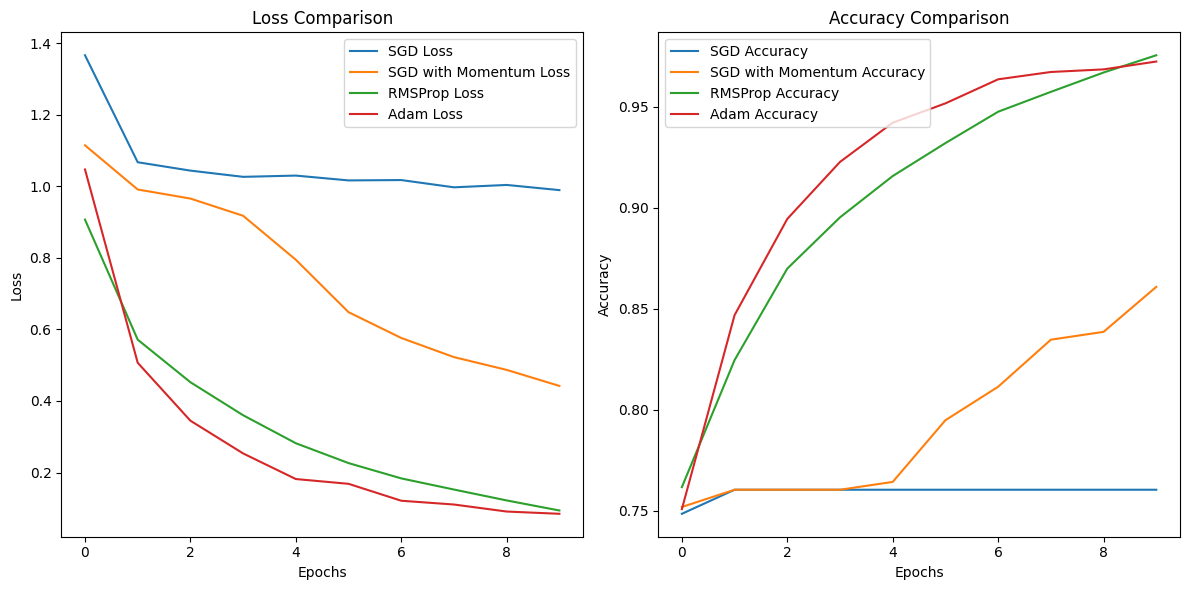

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step
Test Accuracy: 0.98
                     precision    recall  f1-score   support

  atis_abbreviation       1.00      1.00      1.00        33
      atis_aircraft       0.89      0.89      0.89         9
       atis_airfare       0.98      0.90      0.93        48
       atis_airline       0.90      1.00      0.95        38
        atis_flight       0.99      0.99      0.99       631
   atis_flight_time       0.00      0.00      0.00         1
atis_ground_service       1.00      1.00      1.00        36
      atis_quantity       0.38      1.00      0.55         3

           accuracy                           0.98       799
          macro avg       0.77      0.85      0.79       799
       weighted avg       0.98      0.98      0.98       799



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
Predicted Intent: atis_flight


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import matplotlib.pyplot as plt

# Load the dataset files
train_data = pd.read_csv('/content/drive/MyDrive/IDL/Assignment#3/atis_intents_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/IDL/Assignment#3/atis_intents_test.csv')

# Display the first few rows of each dataset to check the structure
print("Training Data:")
print(train_data.head())

print("\nTesting Data:")
print(test_data.head())

# Display column names in the training and testing datasets
print("Training Data Columns:", train_data.columns)
print("Testing Data Columns:", test_data.columns)

# Extract columns explicitly
X_train = train_data.iloc[:, 1]  # Queries (2nd column, index 1)
y_train = train_data.iloc[:, 0]  # Intents (1st column, index 0)

X_test = test_data.iloc[:, 1]  # Queries (2nd column, index 1)
y_test = test_data.iloc[:, 0]  # Intents (1st column, index 0)

# Label encoding for intents
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Tokenize and convert text to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)  # Fit tokenizer on training data only

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences for uniform input size
X_train_pad = pad_sequences(X_train_seq, padding='post')
X_test_pad = pad_sequences(X_test_seq, padding='post')

# Display shapes
print(f"Training data shape: {X_train_pad.shape}")
print(f"Test data shape: {X_test_pad.shape}")
print(f"Number of unique intents: {len(label_encoder.classes_)}")

# Define model parameters
vocab_size = len(tokenizer.word_index) + 1  # Total vocabulary size (+1 for padding token)
max_len = X_train_pad.shape[1]  # Sequence length from padded data
num_classes = len(label_encoder.classes_)  # Number of unique intents

# Verify parameters
print(f"Vocab Size: {vocab_size}, Max Sequence Length: {max_len}, Number of Classes: {num_classes}")

# Build the model
def build_model():
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.5),
        Bidirectional(LSTM(32)),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to plot history for loss and accuracy on the same graph
def plot_history_loss_accuracy(histories, optimizer_names):
    plt.figure(figsize=(12, 6))

    # Plot loss for all optimizers
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['loss'], label=f'{name} Loss')
    plt.title("Loss Comparison")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy for all optimizers
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['accuracy'], label=f'{name} Accuracy')
    plt.title("Accuracy Comparison")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Initialize an empty list to store the histories
histories = []
optimizer_names = []

# 1. Stochastic Gradient Descent (SGD)
sgd_optimizer = SGD(learning_rate=0.01)
model = build_model()
model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_sgd = model.fit(
    X_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1
)
histories.append(history_sgd)
optimizer_names.append("SGD")

# 2. Stochastic Gradient Descent with Momentum
sgd_momentum_optimizer = SGD(learning_rate=0.01, momentum=0.9)
model = build_model()
model.compile(optimizer=sgd_momentum_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_sgd_momentum = model.fit(
    X_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1
)
histories.append(history_sgd_momentum)
optimizer_names.append("SGD with Momentum")

# 3. RMSProp
rmsprop_optimizer = RMSprop(learning_rate=0.001)
model = build_model()
model.compile(optimizer=rmsprop_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_rmsprop = model.fit(
    X_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1
)
histories.append(history_rmsprop)
optimizer_names.append("RMSProp")

# 4. Adam
adam_optimizer = Adam(learning_rate=0.001)
model = build_model()
model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_adam = model.fit(
    X_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1
)
histories.append(history_adam)
optimizer_names.append("Adam")

# Plotting the loss and accuracy for all optimizers
plot_history_loss_accuracy(histories, optimizer_names)

# Evaluate model on test data
y_pred = model.predict(X_test_pad)
y_pred_classes = y_pred.argmax(axis=1)  # Get predicted class indices

# Calculate test accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Test Accuracy: {accuracy:.2f}")

# Generate classification report
report = classification_report(
    y_test, y_pred_classes, target_names=label_encoder.classes_
)
print(report)

# Function to predict intent from a user query
def predict_intent(query):
    # Preprocess the query
    seq = tokenizer.texts_to_sequences([query])
    pad_seq = pad_sequences(seq, maxlen=max_len, padding='post')

    # Predict intent
    prediction = model.predict(pad_seq)
    predicted_class = prediction.argmax(axis=1)[0]
    intent = label_encoder.inverse_transform([predicted_class])[0]

    return intent

# Example usage
user_query = "show me flights from New York to Los Angeles"
predicted_intent = predict_intent(user_query)
print(f"Predicted Intent: {predicted_intent}")


Training Data:
        atis_flight  \
0       atis_flight   
1  atis_flight_time   
2      atis_airfare   
3      atis_airfare   
4       atis_flight   

   i want to fly from boston at 838 am and arrive in denver at 1110 in the morning  
0   what flights are available from pittsburgh to...                                
1   what is the arrival time in san francisco for...                                
2            cheapest airfare from tacoma to orlando                                
3   round trip fares from pittsburgh to philadelp...                                
4   i need a flight tomorrow from columbus to min...                                

Testing Data:
    atis_flight  \
0  atis_airfare   
1   atis_flight   
2   atis_flight   
3   atis_flight   
4   atis_flight   

   i would like to find a flight from charlotte to las vegas that makes a stop in st. louis  
0   on april first i need a ticket from tacoma to...                                         
1   on april first

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


121/121 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.6697 - loss: 1.7798 - val_accuracy: 0.7497 - val_loss: 1.0646
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.7637 - loss: 1.0979 - val_accuracy: 0.7497 - val_loss: 1.0046
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.7616 - loss: 1.0706 - val_accuracy: 0.7497 - val_loss: 0.9878
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - accuracy: 0.7577 - loss: 1.0403 - val_accuracy: 0.7497 - val_loss: 0.9810
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - accuracy: 0.7733 - loss: 1.0071 - val_accuracy: 0.7497 - val_loss: 0.9782
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.7594 - loss: 1.0299 - val_accuracy: 0.7497 - val_loss: 0.9732
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.7575 - loss: 1.0215 - val_accuracy: 0.7497 - val_loss: 0.9716
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.7488 - loss: 1.0537 - val

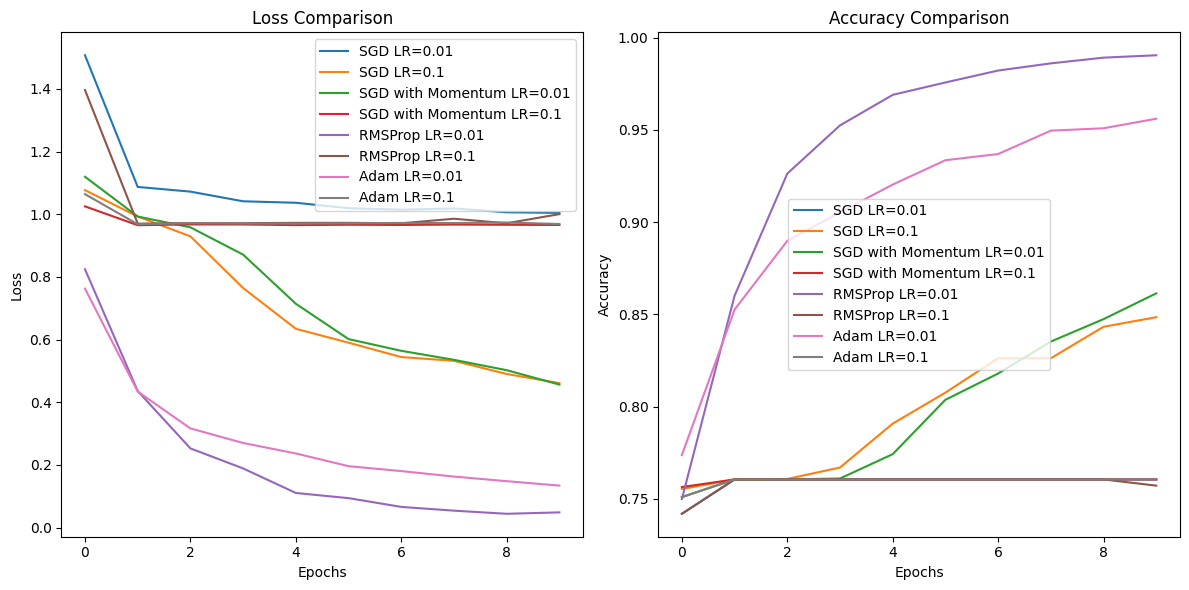

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step
Test Accuracy: 0.79
                     precision    recall  f1-score   support

  atis_abbreviation       0.00      0.00      0.00        33
      atis_aircraft       0.00      0.00      0.00         9
       atis_airfare       0.00      0.00      0.00        48
       atis_airline       0.00      0.00      0.00        38
        atis_flight       0.79      1.00      0.88       631
   atis_flight_time       0.00      0.00      0.00         1
atis_ground_service       0.00      0.00      0.00        36
      atis_quantity       0.00      0.00      0.00         3

           accuracy                           0.79       799
          macro avg       0.10      0.12      0.11       799
       weighted avg       0.62      0.79      0.70       799



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
Predicted Intent: atis_flight


In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import matplotlib.pyplot as plt

# Load the dataset files
train_data = pd.read_csv('/content/drive/MyDrive/IDL/Assignment#3/atis_intents_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/IDL/Assignment#3/atis_intents_test.csv')

# Display the first few rows of each dataset to check the structure
print("Training Data:")
print(train_data.head())

print("\nTesting Data:")
print(test_data.head())

# Display column names in the training and testing datasets
print("Training Data Columns:", train_data.columns)
print("Testing Data Columns:", test_data.columns)

# Extract columns explicitly
X_train = train_data.iloc[:, 1]  # Queries (2nd column, index 1)
y_train = train_data.iloc[:, 0]  # Intents (1st column, index 0)

X_test = test_data.iloc[:, 1]  # Queries (2nd column, index 1)
y_test = test_data.iloc[:, 0]  # Intents (1st column, index 0)

# Label encoding for intents
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Tokenize and convert text to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)  # Fit tokenizer on training data only

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences for uniform input size
X_train_pad = pad_sequences(X_train_seq, padding='post')
X_test_pad = pad_sequences(X_test_seq, padding='post')

# Display shapes
print(f"Training data shape: {X_train_pad.shape}")
print(f"Test data shape: {X_test_pad.shape}")
print(f"Number of unique intents: {len(label_encoder.classes_)}")

# Define model parameters
vocab_size = len(tokenizer.word_index) + 1  # Total vocabulary size (+1 for padding token)
max_len = X_train_pad.shape[1]  # Sequence length from padded data
num_classes = len(label_encoder.classes_)  # Number of unique intents

# Verify parameters
print(f"Vocab Size: {vocab_size}, Max Sequence Length: {max_len}, Number of Classes: {num_classes}")

# Build the model
def build_model():
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.5),
        Bidirectional(LSTM(32)),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to plot history for loss and accuracy on the same graph
def plot_history_loss_accuracy(histories, optimizer_names, learning_rates):
    plt.figure(figsize=(12, 6))

    # Plot loss for all optimizers and learning rates
    plt.subplot(1, 2, 1)
    for history, name, lr in zip(histories, optimizer_names, learning_rates):
        label = f'{name} LR={lr}'
        plt.plot(history.history['loss'], label=label)
    plt.title("Loss Comparison")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy for all optimizers and learning rates
    plt.subplot(1, 2, 2)
    for history, name, lr in zip(histories, optimizer_names, learning_rates):
        label = f'{name} LR={lr}'
        plt.plot(history.history['accuracy'], label=label)
    plt.title("Accuracy Comparison")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Initialize an empty list to store the histories
histories = []
optimizer_names = []
learning_rates = []

# Loop through different learning rates
learning_rate_values = [0.01, 0.1]

# 1. Stochastic Gradient Descent (SGD)
for lr in learning_rate_values:
    sgd_optimizer = SGD(learning_rate=lr)
    model = build_model()
    model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_sgd = model.fit(
        X_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1
    )
    histories.append(history_sgd)
    optimizer_names.append("SGD")
    learning_rates.append(lr)

# 2. Stochastic Gradient Descent with Momentum
for lr in learning_rate_values:
    sgd_momentum_optimizer = SGD(learning_rate=lr, momentum=0.9)
    model = build_model()
    model.compile(optimizer=sgd_momentum_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_sgd_momentum = model.fit(
        X_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1
    )
    histories.append(history_sgd_momentum)
    optimizer_names.append("SGD with Momentum")
    learning_rates.append(lr)

# 3. RMSProp
for lr in learning_rate_values:
    rmsprop_optimizer = RMSprop(learning_rate=lr)
    model = build_model()
    model.compile(optimizer=rmsprop_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_rmsprop = model.fit(
        X_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1
    )
    histories.append(history_rmsprop)
    optimizer_names.append("RMSProp")
    learning_rates.append(lr)

# 4. Adam
for lr in learning_rate_values:
    adam_optimizer = Adam(learning_rate=lr)
    model = build_model()
    model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_adam = model.fit(
        X_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1
    )
    histories.append(history_adam)
    optimizer_names.append("Adam")
    learning_rates.append(lr)

# Plotting the loss and accuracy for all optimizers and learning rates
plot_history_loss_accuracy(histories, optimizer_names, learning_rates)

# Evaluate model on test data
y_pred = model.predict(X_test_pad)
y_pred_classes = y_pred.argmax(axis=1)  # Get predicted class indices

# Calculate test accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Test Accuracy: {accuracy:.2f}")

# Generate classification report
report = classification_report(
    y_test, y_pred_classes, target_names=label_encoder.classes_
)
print(report)

# Function to predict intent from a user query
def predict_intent(query):
    # Preprocess the query
    seq = tokenizer.texts_to_sequences([query])
    pad_seq = pad_sequences(seq, maxlen=max_len, padding='post')

    # Predict intent
    prediction = model.predict(pad_seq)
    predicted_class = prediction.argmax(axis=1)[0]
    intent = label_encoder.inverse_transform([predicted_class])[0]

    return intent

# Example usage
user_query = "show me flights from New York to Los Angeles"
predicted_intent = predict_intent(user_query)
print(f"Predicted Intent: {predicted_intent}")
